# Business Objective:
#    This is a sample dataset which consists of 161297 drug name, condition reviews and ratings from different patients and our # goal is to examine how patients are feeling using the drugs their positive and negative experiences so that we can recommend him a suitable drug. 
#    By analyzing the reviews, we can understand the drug effectiveness and its side effects. 
# The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.
#    So in this dataset, we can see many patients conditions but we will focus only on the below, classify 
# the below conditions from the patients reviews 
# a. Depression
# c. High Blood Pressure
# d. Diabetes, Type 2


In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")

# EDA

In [3]:
df=pd.read_csv("drugsCom_raw.tsv",sep="\t")
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [5]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
drug=df.dropna(inplace=True)

In [7]:
drug=df.head()
drug

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [8]:
drug.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [9]:
drug1=df[(df["condition"]== 'Depression')|(df["condition"]== 'High Blood Pressure')|(df["condition"]== 'Diabetes, Type 2')]

In [10]:
drug1.shape

(13944, 7)

In [11]:
drug1["condition"].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [12]:
drug1

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


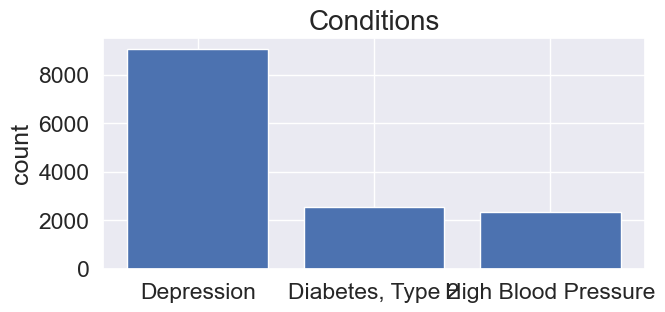

In [26]:
# Plotting a bargraph of 'conditions'
plt.figure(figsize=(7,3))
conditions = drug1['condition'].value_counts(ascending = False)
plt.bar(conditions.index,conditions.values)
plt.title('Conditions',fontsize = 20)
plt.ylabel('count')
plt.show()

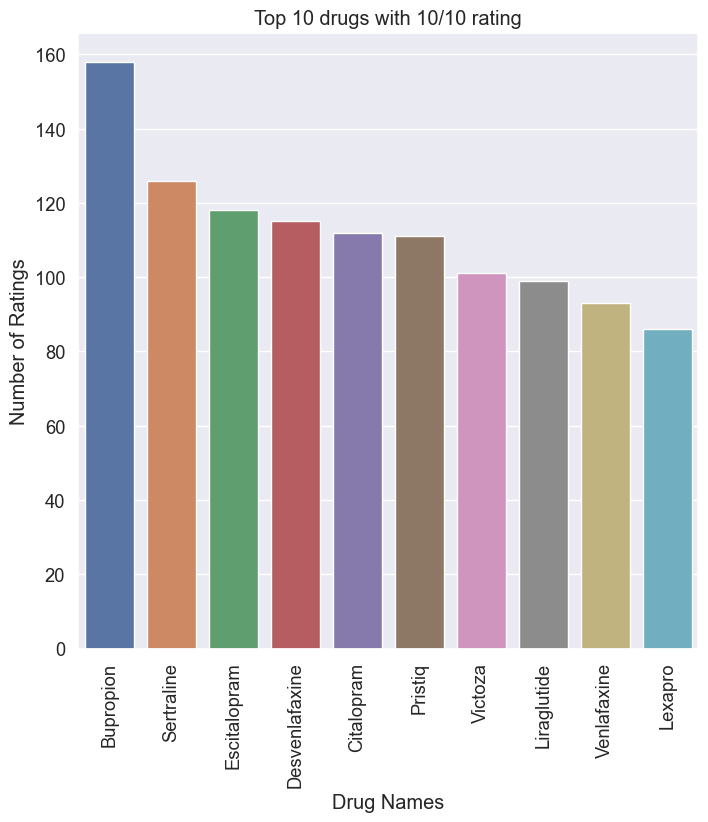

In [16]:
# Plotting barplot which shows the top 10 drugs with 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 8]

rating = dict(drug1.loc[drug1.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sb_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10])
sb_rating.set_title('Top 10 drugs with 10/10 rating')
sb_rating.set_ylabel("Number of Ratings")
sb_rating.set_xlabel("Drug Names")
plt.setp(sb_rating.get_xticklabels(), rotation=90);

In [18]:
drug1['condition'].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [21]:
!python -m spacy download en_core_web_sm
!pip install WordCloud
!pip install spacy
!pip install nltk

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 871.5 kB/s eta 0:00:15
     --------------------------------------- 0.1/12.8 MB 871.5 kB/s eta 0:00:15
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.4 MB/s eta 0:00:09
     - -------------------------------------- 0.5/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/12.8 MB 2.1 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/12.8 MB 2.1 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/12.8 MB 2.0 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/12.8 MB 2.3 MB/s eta 

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl#egg=en_core_web_sm==3.3.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


In [20]:
X_dep=drug1[(drug1["condition"]=="Depression")]
X_HBP=drug1[(drug1["condition"]=="High Blood Pressure")]
X_Dia=drug1[(drug1["condition"]=="Diabetes, Type 2")]

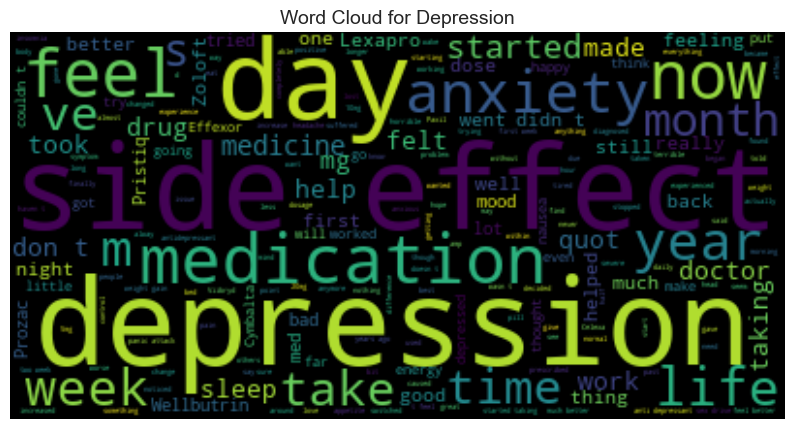

In [22]:
# WordCloud of 'reviews' under 'depression' condition
from wordcloud import WordCloud
plt.figure(figsize = (10,10))
wordcloud_stw = WordCloud(background_color= 'black',
                          width = 400,
                          height = 200).generate( " ".join(X_dep.review))

plt.imshow(wordcloud_stw,interpolation="bilinear")
plt.title("Word Cloud for Depression",fontsize=14)
plt.axis('off');

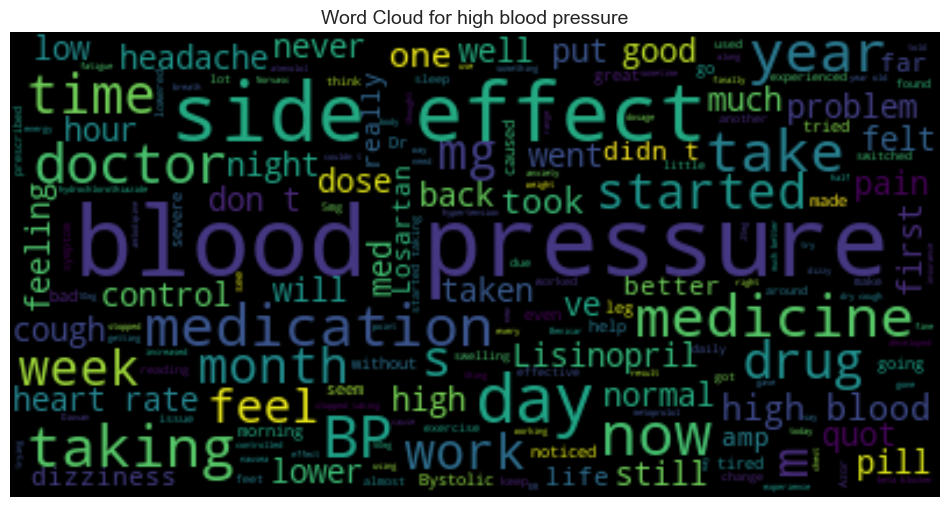

In [23]:
plt.figure(figsize = (12,12))
wc = WordCloud(background_color= 'black',
                          width = 400,
                          height = 200).generate(" ".join(X_HBP.review))

plt.imshow(wc,interpolation="bilinear")
plt.title("Word Cloud for high blood pressure",fontsize=14)
plt.axis('off');

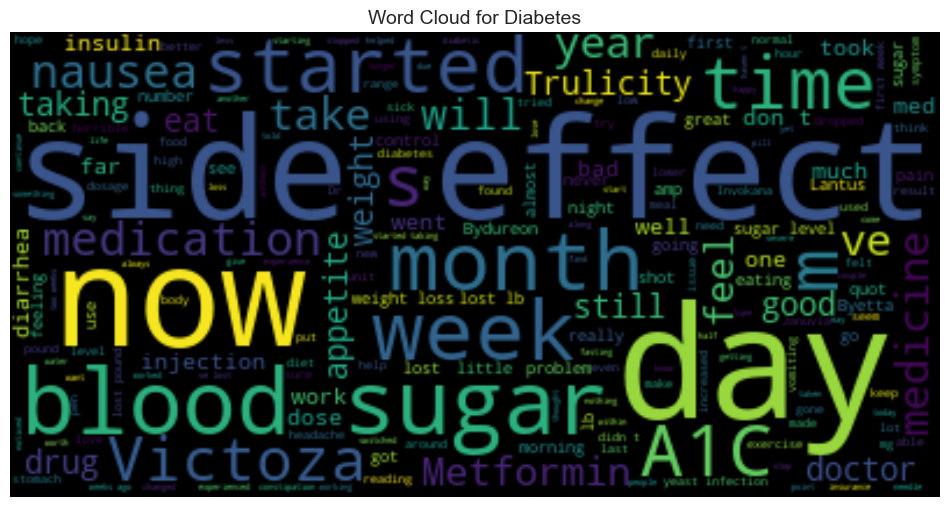

In [24]:
plt.figure(figsize = (12,12))
wc = WordCloud(background_color= 'black',
                          width = 400,
                          height = 200).generate( " ".join(X_Dia.review))

plt.imshow(wc,interpolation="bilinear")
plt.title("Word Cloud for Diabetes",fontsize=14)
plt.axis('off');

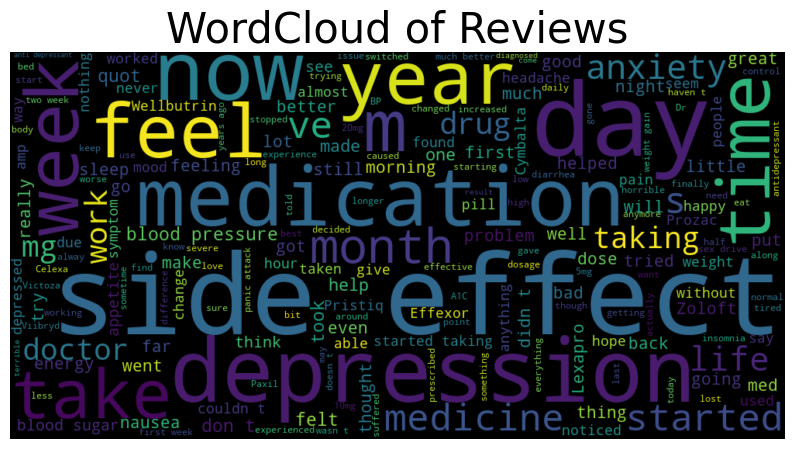

In [113]:
# WordCloud of 'review'
from wordcloud import WordCloud
text = (' '.join(drug1['review'])) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'black').generate(text)
plt.figure(figsize=(10, 10))
plt.title('WordCloud of Reviews', fontsize = 30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [ ]:
## Remove HTML tags ##
# (Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</span>...", we will use get_text() to remove the html tags if there are any)
## Remove Stop Words ##
# (Remove the stopwords like "a", "the", "I" etc)
## Remove symbols and special characters ##
# (We will remove the special characters from our reviews like '#' ,'&' ,'@' etc)
## Tokenize ##
# (We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come")
## Stemming ##
# (Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word")

In [27]:
# Import the libraries for pre-processing
import regex
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #English stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_clean(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. Space join words
    return( ' '.join(stemming_words))

In [28]:
drug2=drug1.drop(["Unnamed: 0",'date'],axis=1)
drug2

,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166
...,...,...,...,...,...
161251,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39
161258,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33


# Sentiment Analysis

In [29]:
# let's make a new column of review sentiment 
drug2.loc[(drug2['rating'] > 5), 'Review_Sentiment'] = '1'  # positive 
drug2.loc[(drug2['rating'] == 5), 'Review_Sentiment'] = '0' # neutral
drug2.loc[(drug2['rating'] < 5), 'Review_Sentiment'] = '-1' # negative
drug2

,drugName,condition,review,rating,usefulCount,Review_Sentiment
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,-1
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1
...,...,...,...,...,...,...
161251,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,-1
161258,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,-1
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,1
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,-1


In [30]:
drug2['Review_Sentiment'].value_counts()

1     9701
-1    3487
0      756
Name: Review_Sentiment, dtype: int64

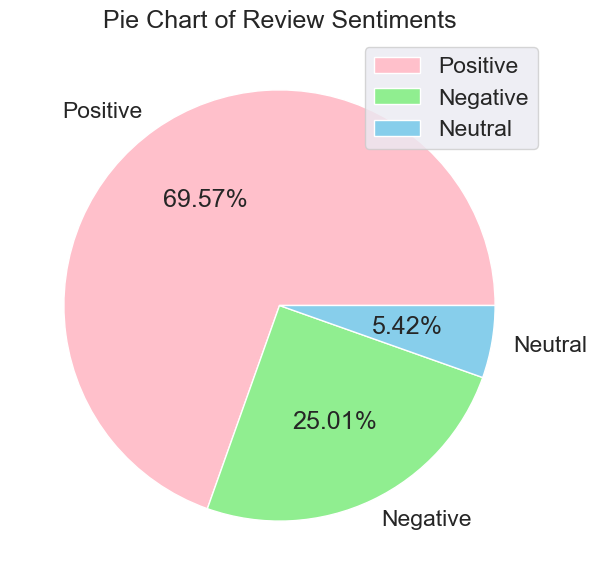

In [31]:
# A pie chart to represent the sentiments of the patients
size = [9701, 3487, 756]
colors = ['pink', 'lightgreen', 'skyblue']
labels = "Positive", "Negative", "Neutral"

plt.rcParams['figure.figsize'] = (7,7)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart of Review Sentiments', fontsize = 18)
plt.legend()
plt.show()

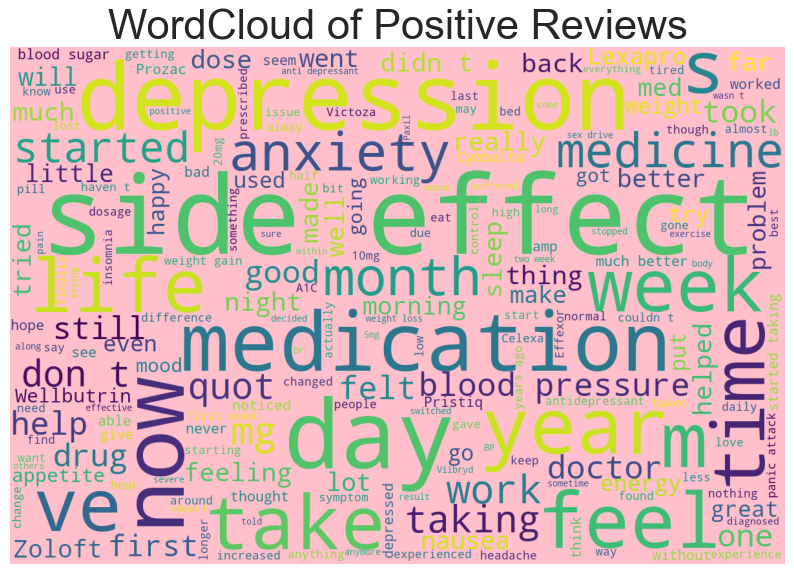

In [32]:
# WordCloud of 'Postive sentiment'
positive_sentiment = " ".join([text for text in drug2['review'][drug2['Review_Sentiment'] == '1']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiment)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WordCloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

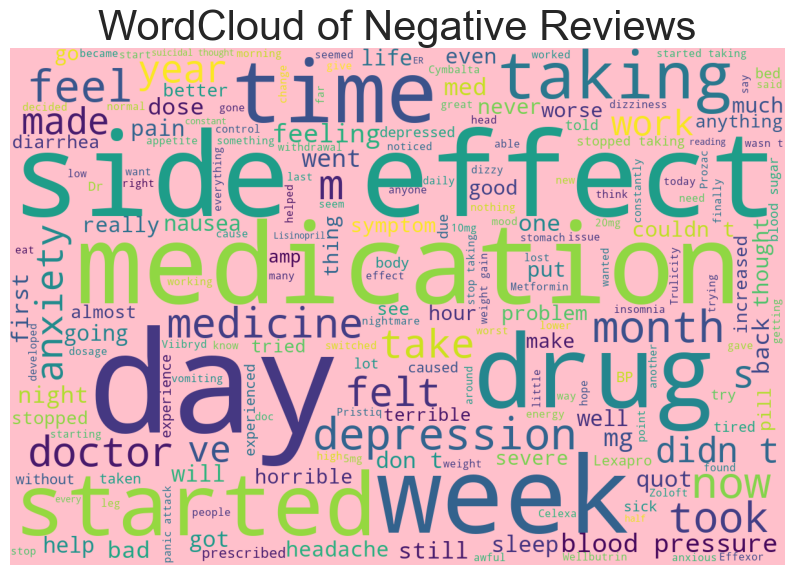

In [33]:
# WordCloud of 'Diabetes, Type 2 sentiment'
negative_sentiment = " ".join([text for text in drug2['review'][drug2['Review_Sentiment'] == '-1']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiment)

plt.rcParams['figure.figsize'] = (10, 10)

plt.title('WordCloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

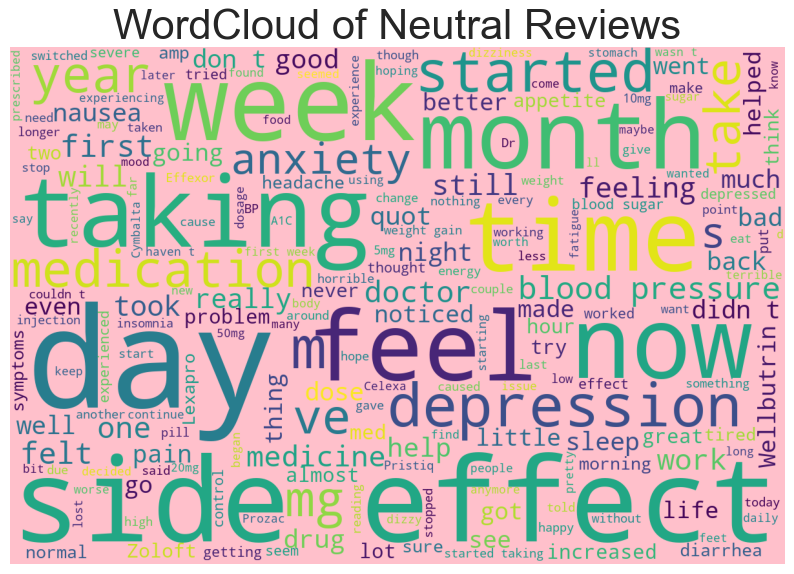

In [34]:
# WordCloud of 'High Blood Pressure sentiment'
neutral_sentiment = " ".join([text for text in drug2['review'][drug2['Review_Sentiment'] == '0']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink', stopwords = stopwords, width = 1200, height = 800).generate(neutral_sentiment)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WordCloud of Neutral Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Emotional Mining

In [35]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [36]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [37]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [38]:
# Test it to see if it works
calculate_sentiment(text='super') # Depression

3

In [39]:
calculate_sentiment(text='burden') # Diabetes, Type 2

-2

In [40]:
# Applying function to 'review'
drug2['Sentiment_value']=drug2['review'].apply(calculate_sentiment) 
drug2

,drugName,condition,review,rating,usefulCount,Review_Sentiment,Sentiment_value
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1,2
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1,-5
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,-1,-2
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1,5
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1,3
...,...,...,...,...,...,...,...
161251,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,-1,-5
161258,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,-1,-4
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,1,3
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,-1,-9


In [42]:
# Sentiment score of the whole review
drug2['Sentiment_value'].describe()

count    13944.000000
mean        -0.769220
std          6.425333
min        -33.000000
25%         -4.000000
50%          0.000000
75%          3.000000
max         25.000000
Name: Sentiment_value, dtype: float64

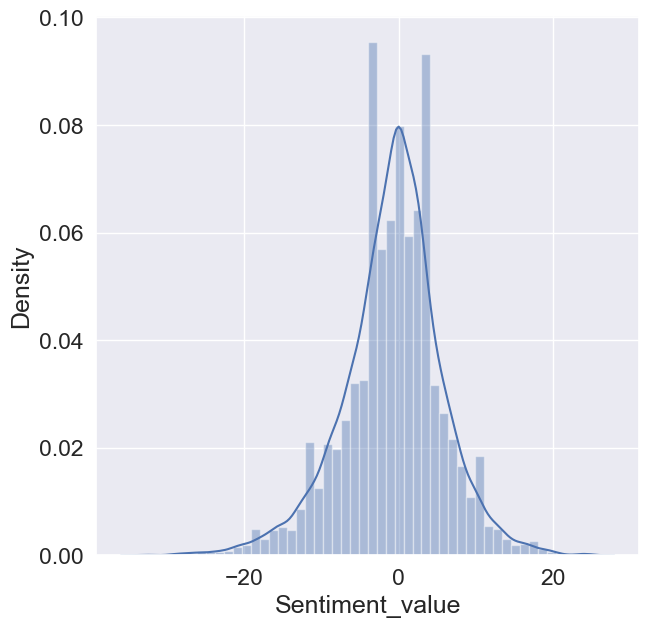

In [46]:
# Distplot of 'sentiment value'
plt.figure(figsize=(7,7))
sns.distplot(drug2['Sentiment_value'])
plt.show()

# Model building using Sentiment

In [84]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

fea_v = drug2['review']

tar_v = drug2['Review_Sentiment']

x_train, x_test, y_train, y_test = train_test_split(fea_v, tar_v, test_size = 0.3, random_state = 42)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import itertools

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(x_train)

count_test = count_vectorizer.transform(x_test)

In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 1) Naive Bayes Algorithm

accuracy:   0.793
Confusion matrix, without normalization


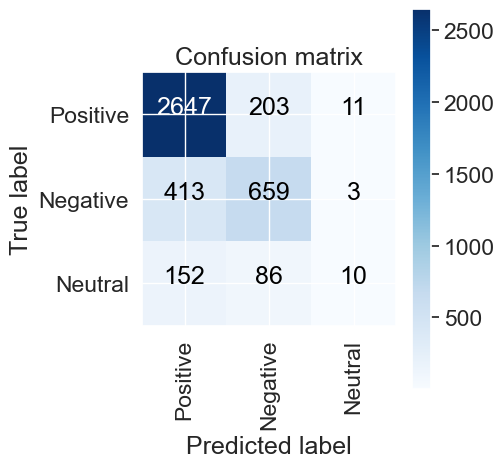

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn import metrics

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score_mnb_c = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_mnb_c)

cm = metrics.confusion_matrix(y_test, pred, labels=['1', '-1', '0'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

# 2) Passive Agressive Classifier

accuracy:   0.828
Confusion matrix, without normalization


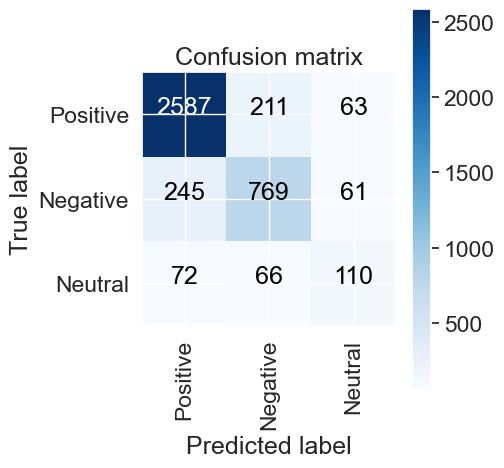

In [88]:
from sklearn.linear_model import PassiveAggressiveClassifier

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score_pac_c = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_pac_c)

cm = metrics.confusion_matrix(y_test, pred, labels=['1', '-1', '0'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

 # 3) Random Forest Classifier

accuracy:   0.793
Confusion matrix, without normalization


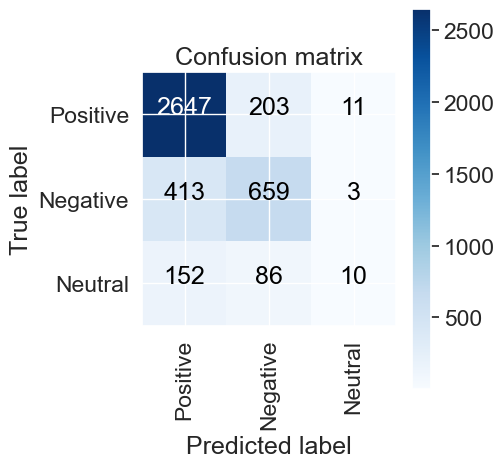

In [89]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(count_train, y_train)
pred = mnb.predict(count_test)
score_rfc_c = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_rfc_c)

cm = metrics.confusion_matrix(y_test, pred, labels=['1', '-1', '0'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

# 4) Support Vector Machine

accuracy: 0.817
Confusion matrix, without normalization


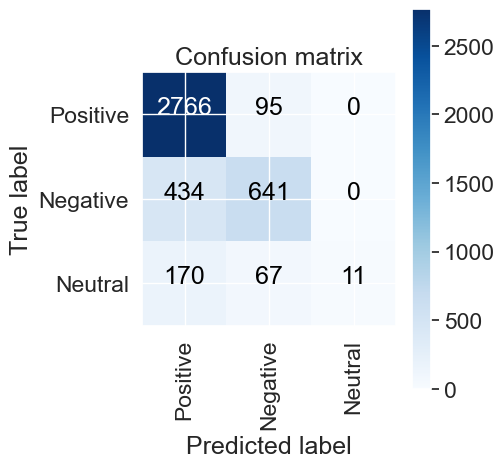

In [90]:
from sklearn import svm
sv = svm.SVC() 
sv.fit(count_train, y_train)
pred1=sv.predict(count_test)
score1=metrics.accuracy_score(y_test,pred1)
print("accuracy: %0.3f"% score1)

cm = metrics.confusion_matrix(y_test, pred1, labels=['1', '-1', '0'])
plot_confusion_matrix(cm, classes=['Positive', 'Negative', 'Neutral'])

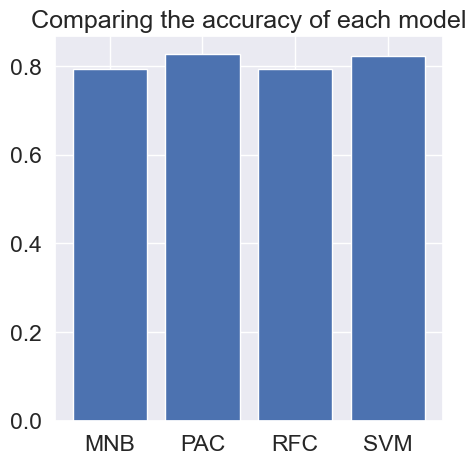

In [54]:
Accuracy = [score_mnb_c, score_pac_c, score_rfc_c, score_svm_c]
Methods = ['MNB', 'PAC', 'RFC', 'SVM']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

# == From the above visualization, we can see that 'PAC' model has the high accuracy among all

# Prediction Sample

In [93]:
text1 = ["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them"]
test = count_vectorizer.transform(text1)
pred1 = passive.predict(test)[0]
pred1

'1'

In [94]:
text2 = ["my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"]
test = count_vectorizer.transform(text2)
pred2 = passive.predict(test)[0]
pred2

'-1'

In [95]:
text3 = ["c normal rang lost lbs lab great due weight loss mcg year last c good last time doctor want decreas mcg sever dermatologist last year tri figur hair loss unhealthi hair chang textur never want attribut byetta although hair loss start month began take desper stop hair loss consid stop byetta decid would wors bald gain back pound would realli love know person recent post hair regrowth stop byetta "]
test = count_vectorizer.transform(text3)
pred3 = passive.predict(test)[0]
pred3

'1'

# Model Bulding using Condition 

In [55]:
from sklearn.model_selection import train_test_split

fea = drug2['review']
tar = drug2['condition']

x_train, x_test, y_train, y_test = train_test_split(fea, tar, test_size = 0.3, random_state = 42)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import itertools

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(x_train)

count_test = count_vectorizer.transform(x_test)

# naive bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn import metrics

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score_mnb_c = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_mnb_c)


from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred))

accuracy:   0.957
                     precision    recall  f1-score   support

         Depression       0.96      0.98      0.97      2731
   Diabetes, Type 2       0.96      0.94      0.95       746
High Blood Pressure       0.92      0.87      0.90       707

           accuracy                           0.96      4184
          macro avg       0.95      0.93      0.94      4184
       weighted avg       0.96      0.96      0.96      4184



Confusion matrix, without normalization


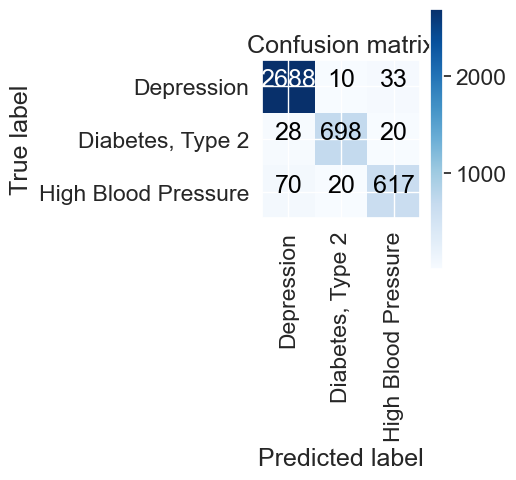

In [60]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# RandomForest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(count_train, y_train)
pred3=rf.predict(count_test)
score3=metrics.accuracy_score(y_test,pred3)
print("accuracy: %0.3f"% score3)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred3))


accuracy: 0.957
                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      2731
   Diabetes, Type 2       0.98      0.93      0.95       746
High Blood Pressure       0.97      0.84      0.90       707

           accuracy                           0.96      4184
          macro avg       0.97      0.92      0.94      4184
       weighted avg       0.96      0.96      0.96      4184



Confusion matrix, without normalization


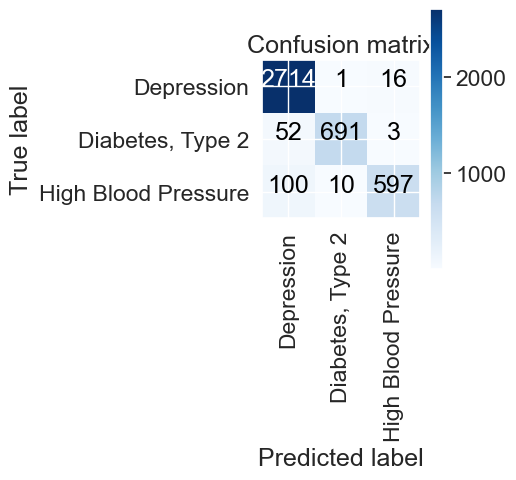

In [62]:
cm = metrics.confusion_matrix(y_test, pred3, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# TfidfVectorizer - TFIDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

T_fidfVectorizer =TfidfVectorizer()
T1_train=T_fidfVectorizer.fit_transform(x_train)
T1_test=T_fidfVectorizer.transform(x_test)

T1 = PassiveAggressiveClassifier() 
T1.fit(T1_train, y_train)
pred6=T1.predict(T1_test)
score6=metrics.accuracy_score(y_test,pred6)
print("accuracy: %0.3f"% score6)

print(classification_report(y_test,pred6))

accuracy: 0.966
                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      2731
   Diabetes, Type 2       0.97      0.95      0.96       746
High Blood Pressure       0.94      0.91      0.92       707

           accuracy                           0.97      4184
          macro avg       0.96      0.95      0.95      4184
       weighted avg       0.97      0.97      0.97      4184



Confusion matrix, without normalization


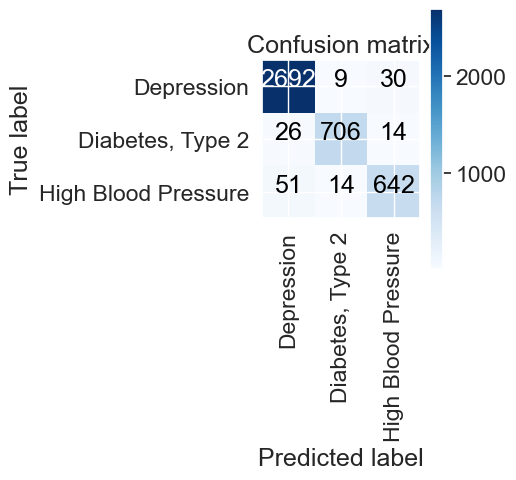

In [66]:
cm = metrics.confusion_matrix(y_test, pred6, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# TFIDF - Bigram

In [68]:
T_fidfVectorizer2=TfidfVectorizer(ngram_range=(1,2))
T1_train2=T_fidfVectorizer2.fit_transform(x_train)
T1_test2=T_fidfVectorizer2.transform(x_test)

bi = PassiveAggressiveClassifier() 
bi.fit(T1_train2, y_train)
pred7=bi.predict(T1_test2)
score7=metrics.accuracy_score(y_test,pred7)
print("accuracy: %0.3f"% score7)

print(classification_report(y_test,pred7))

accuracy: 0.968
                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      2731
   Diabetes, Type 2       0.98      0.95      0.96       746
High Blood Pressure       0.96      0.90      0.93       707

           accuracy                           0.97      4184
          macro avg       0.97      0.95      0.96      4184
       weighted avg       0.97      0.97      0.97      4184



Confusion matrix, without normalization


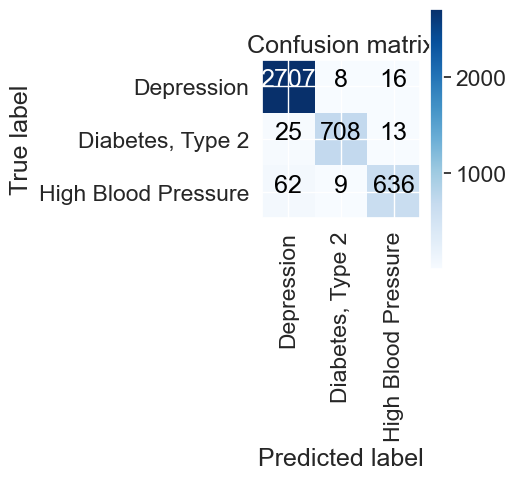

In [69]:
cm = metrics.confusion_matrix(y_test, pred7, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

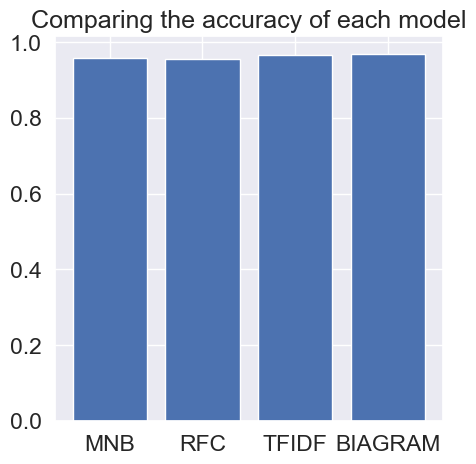

In [83]:
Accuracy = [score_mnb_c, score3, score6, score7]
Methods = ['MNB', 'RFC',"TFIDF", 'BIAGRAM']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

# == From the above visualization, we can see that 'TFIDF-Biagram' model has the high accuracy among all

# Sample Prediction

In [99]:
text1 = ["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them"]
test = T_fidfVectorizer.transform(text1)
pred1 = T1.predict(test)[0]
pred1

'Depression'

In [104]:
text2 = ["My blood pressure has been around 160/100. Doctor prescribed Azor 40/10. Just 4 hrs later my reading showed 120/82. I was amazed. I am now on it daily. Thanks to Azor"]
test = T_fidfVectorizer.transform(text3)
pred2 = T1.predict(test)[0]
pred2

'High Blood Pressure'

In [106]:
import joblib
joblib.dump(T_fidfVectorizer,'T_fidfVectorizer.pkl')
joblib.dump(T1,'Passmodel.pkl')

['Passmodel.pkl']

In [108]:
vectorizer= joblib.load('T_fidfVectorizer.pkl')
model=joblib.load('Passmodel.pkl')

test = model.predict(vectorizer.transform(["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them"]))
test[0]                    

'Depression'